In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Loading and preliminary understanding of the data

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [5]:
train_df.shape

(188533, 13)

In [6]:
train_df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [7]:
# Checking the number of null values in each column in the dataset
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [7]:
train_df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [8]:
train_df.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [9]:
# Columns you're interested in checking unique values
columns_to_check = ['brand', 'model_year', 'transmission']

# Get the unique values for each column and store them in a DataFrame
#unique_values_dict = {col: train_df[col].unique() for col in columns_to_check}
#unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in unique_values_dict.items()]))

# Display the unique values DataFrame
#print(unique_values_df)

In [9]:
train_df['model'].unique()

array(['Cooper S Base', 'LS V8', 'Silverado 2500 LT', ..., 'e-Golf SE',
       'Integra w/A-Spec Tech Package', 'IONIQ Plug-In Hybrid SEL'],
      dtype=object)

In [10]:
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [11]:
train_df['price'].max()

2954083

In [12]:
train_df['price'].median()

30825.0

In [13]:
train_df['price'].mean()

43878.01617753921

In [14]:
train_df['milage'].max()

405000

In [16]:
train_df['milage'].median()

57785.0

In [15]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [16]:
train_df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [19]:
train_df[['accident', 'clean_title', 'fuel_type']]

,accident,clean_title,fuel_type
0,None reported,Yes,Gasoline
1,At least 1 accident or damage reported,Yes,Gasoline
2,None reported,Yes,E85 Flex Fuel
3,None reported,Yes,Gasoline
4,None reported,Yes,Gasoline
...,...,...,...
188528,None reported,Yes,Gasoline
188529,At least 1 accident or damage reported,Yes,Gasoline
188530,None reported,Yes,Gasoline
188531,None reported,NaN,Gasoline


In [20]:
train_df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [17]:
train_df['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [22]:
train_df.groupby('model_year').size()

model_year
1974       12
1992       14
1993      140
1994       92
1995      102
1996      189
1997      312
1998      343
1999      554
2000      558
2001     1534
2002     1282
2003     1906
2004     2570
2005     3129
2006     2814
2007     4876
2008     5156
2009     2716
2010     4235
2011     6265
2012     6095
2013     6796
2014     8415
2015    11389
2016    13696
2017    12794
2018    16414
2019    15409
2020    15848
2021    18198
2022    15749
2023     8769
2024      162
dtype: int64

In [23]:
train_df['model_year'].value_counts()

2021    18198
2018    16414
2020    15848
2022    15749
2019    15409
2016    13696
2017    12794
2015    11389
2023     8769
2014     8415
2013     6796
2011     6265
2012     6095
2008     5156
2007     4876
2010     4235
2005     3129
2006     2814
2009     2716
2004     2570
2003     1906
2001     1534
2002     1282
2000      558
1999      554
1998      343
1997      312
1996      189
2024      162
1993      140
1995      102
1994       92
1992       14
1974       12
Name: model_year, dtype: int64

In [24]:
train_df['accident'].value_counts()

None reported                             144514
At least 1 accident or damage reported     41567
Name: accident, dtype: int64

In [25]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [26]:
train_df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [18]:
percentage_null = train_df.isna().sum() / len(train_df)

In [19]:
percentage_null

id              0.000000
brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       0.026961
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        0.013006
clean_title     0.113609
price           0.000000
dtype: float64

In [20]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [21]:
nan_column = []

for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        nan_column.append(col)
        
for col in nan_column:
    most_freq = train_df[col].mode()[0]
    train_df[col].fillna(most_freq, inplace=True)
    test_df[col].fillna(most_freq, inplace=True)

C:\Users\cocou\AppData\Local\Temp\ipykernel_18240\2115210543.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(most_freq, inplace=True)
C:\Users\cocou\AppData\Local\Temp\ipykernel_18240\2115210543.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [22]:
nan_column

['fuel_type', 'accident', 'clean_title']

In [23]:
test_df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [24]:
train_df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [25]:
# Drop useless column
train_df.drop('id', axis=1, inplace=True)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     188533 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      188533 non-null  object
 10  clean_title   188533 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [27]:
sample_id = test_df['id']

In [28]:
test_df.drop('id', axis=1, inplace=True)

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         125690 non-null  object
 1   model         125690 non-null  object
 2   model_year    125690 non-null  int64 
 3   milage        125690 non-null  int64 
 4   fuel_type     125690 non-null  object
 5   engine        125690 non-null  object
 6   transmission  125690 non-null  object
 7   ext_col       125690 non-null  object
 8   int_col       125690 non-null  object
 9   accident      125690 non-null  object
 10  clean_title   125690 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.5+ MB


In [30]:
train_df['model_year'].dtype

dtype('int64')

In [31]:
train_df['model_year'] = train_df['model_year'].astype(str)
test_df['model_year'] = test_df['model_year'].astype(str)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  object
 3   milage        188533 non-null  int64 
 4   fuel_type     188533 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      188533 non-null  object
 10  clean_title   188533 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 17.3+ MB


In [33]:
# Split data for training

X = train_df.drop('price', axis = 1)
y = train_df['price']

In [34]:
from feature_engine.encoding import RareLabelEncoder

for col in X.columns:
      if X[col].dtype == 'object':
            rare_encoder = RareLabelEncoder(tol=0.0001, n_categories=10, variables=[col])
            X = rare_encoder.fit_transform(X)
            test_df = rare_encoder.transform(test_df)

c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable fuel_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable accident is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable clean_title is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


In [36]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
      if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        test_df[col] = le.transform(test_df[col])

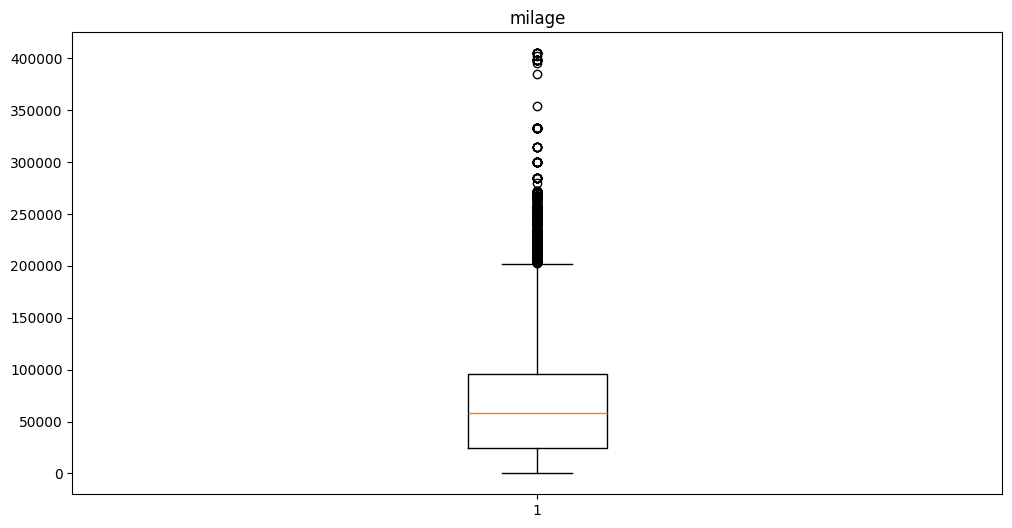

In [40]:
num_cols = ['milage']
for col in num_cols:
    plt.figure(figsize=(12,6))
    plt.boxplot(X[col])
    plt.title(col)
    plt.show()

In [41]:
def removing_outliers_using_quarties(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    mask = (df[col] > lower_limit) & (df[col] < upper_limit)
    return mask

In [42]:
mask = removing_outliers_using_quarties(X,'milage')
X = X[mask]
y = y[mask]

C:\Users\cocou\AppData\Local\Temp\ipykernel_18240\1880773685.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['milage'])


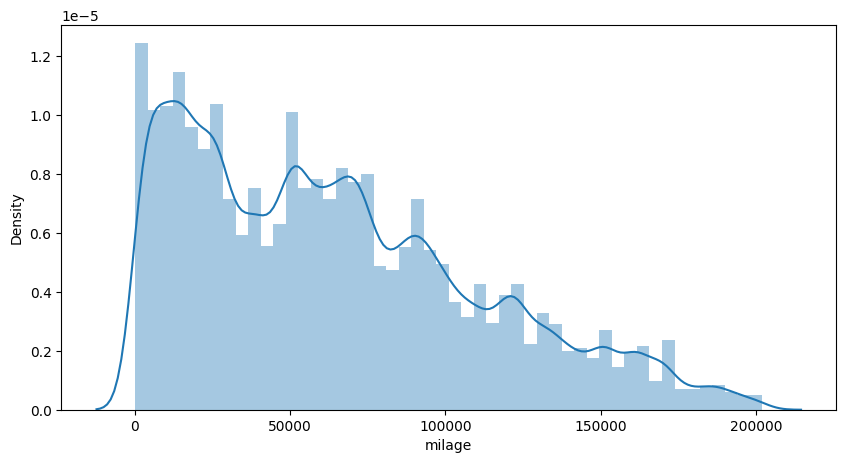

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(X['milage'])
plt.show()

In [46]:
d = pd.DataFrame(y)
mask = removing_outliers_using_quarties(d,'price')
X = X[mask]
y = y[mask]

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X['milage'] = scaler.fit_transform(X[['milage']])
test_df['milage'] = scaler.transform(test_df[['milage']])

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold , GridSearchCV , train_test_split , RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [75]:

dtree_regressor = DecisionTreeRegressor(max_depth=10, max_features='log2', min_samples_split=10)

dtree_regressor.fit(X, y)

DecisionTreeRegressor(max_depth=10, max_features='log2', min_samples_split=10)

In [66]:
# Create and train pipeline
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [76]:
# Predict on test data
y_pred = dtree_regressor.predict(test_df)

In [67]:
y_pred = model.predict(test_df)

In [77]:
sub = dtree_regressor.predict(test_df)
sub

array([15309.64309603, 60190.94974874, 45876.57142857, ...,
       23414.93574524, 18440.92652411, 33827.08048905])

In [78]:
#prepare the submission
sub_df = pd.DataFrame({'id':sample_id,'price':sub})
sub_df.head()

,id,price
0,188533,15309.643096
1,188534,60190.949749
2,188535,45876.571429
3,188536,19833.953281
4,188537,28851.139063


In [79]:
sub_df.to_csv('prices_cars_project_based.csv',index=False)